**Decision Trees**

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('../data/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [6]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])

df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [7]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [9]:
cm = {'drugY' : 0, 'drugC' : 1, 'drugX' : 2, 'drugA' : 3, 'drugB' : 4}  #custom map
df['Drug_no'] = df['Drug'].map(cm)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_no
0,23,0,0,0,25.355,drugY,0
1,47,1,1,0,13.093,drugC,1
2,47,1,1,0,10.114,drugC,1
3,28,0,2,0,7.798,drugX,2
4,61,0,1,0,18.043,drugY,0
...,...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC,1
196,16,1,1,0,12.006,drugC,1
197,52,1,2,0,9.894,drugX,2
198,23,1,2,1,14.020,drugX,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
 6   Drug_no      200 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 11.1+ KB


In [11]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
Y = df['Drug_no']

X.corrwith(Y)

Age            0.116672
Sex            0.084186
BP            -0.171052
Cholesterol    0.061895
Na_to_K       -0.679433
dtype: float64

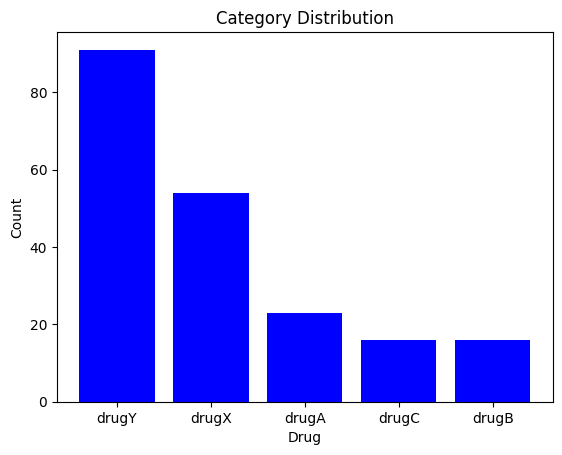

In [16]:
cat_count = df['Drug'].value_counts()

plt.bar(cat_count.index, cat_count.values, color='blue')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Category Distribution')
# plt.xticks(rotation=45)

plt.show()

In [17]:
print(X)

     Age  Sex  BP  Cholesterol  Na_to_K
0     23    0   0            0   25.355
1     47    1   1            0   13.093
2     47    1   1            0   10.114
3     28    0   2            0    7.798
4     61    0   1            0   18.043
..   ...  ...  ..          ...      ...
195   56    0   1            0   11.567
196   16    1   1            0   12.006
197   52    1   2            0    9.894
198   23    1   2            1   14.020
199   40    0   1            1   11.349

[200 rows x 5 columns]


In [18]:
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size= 0.2 , random_state= 42)

In [19]:
drug_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [20]:
drug_tree.fit(X_train, Y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [21]:
tree_pred= drug_tree.predict(X_test)

In [24]:
print("Decision Trees's Accuracy: ", metrics.accuracy_score(Y_test, tree_pred))

Decision Trees's Accuracy:  1.0


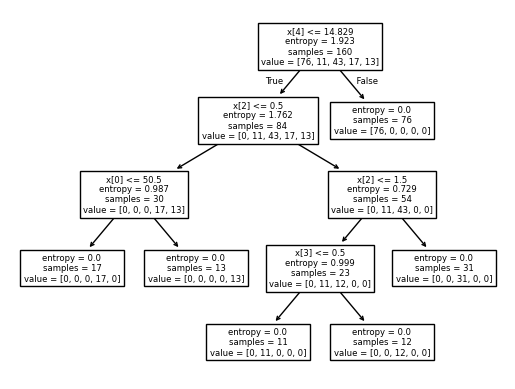

In [ ]:
plot_tree(drug_tree)
plt.show() # not necessary